# 📚 SQL Books - Análisis de Plataforma de Lectura

## Contexto del Proyecto
Este proyecto analiza una base de datos de una plataforma de lectura en línea, con el objetivo de extraer información estratégica que pueda ser aprovechada para mejorar la propuesta de valor del servicio. El análisis se realizó utilizando **SQL** a través de Python con `SQLAlchemy` y `pandas`.

---

## 🎯 Objetivos
- Identificar tendencias en la publicación de libros a partir del año 2000.
- Analizar el comportamiento de los usuarios respecto a calificaciones y reseñas.
- Determinar las editoriales y autores con mejor desempeño en términos de publicaciones y calificaciones.
- Explorar el comportamiento de los usuarios más activos en la plataforma.

---

## 🗂️ Estructura de los Datos

A continuación se muestra el diagrama entidad-relación de la base de datos:

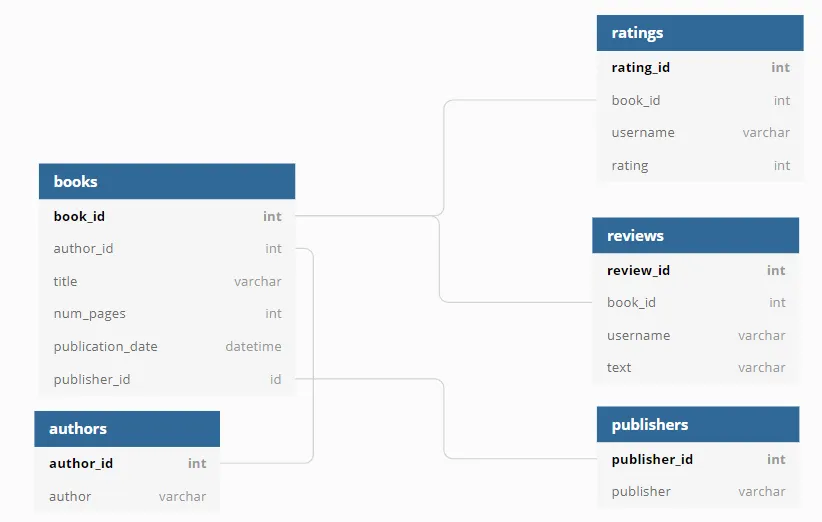

Las tablas involucradas son:
- **books**: información de cada libro (título, páginas, fecha de publicación).
- **authors**: nombre de los autores.
- **publishers**: nombre de las editoriales.
- **ratings**: calificaciones otorgadas por los usuarios.
- **reviews**: reseñas de texto escritas por los usuarios.

---

## 📋 Consultas Realizadas
1. Número de libros publicados después del 1 de enero de 2000.
2. Número de reseñas y calificación promedio por libro.
3. Editorial con más libros de más de 50 páginas.
4. Autor con la calificación promedio más alta (mínimo 50 calificaciones por libro).
5. Promedio de reseñas de texto entre usuarios que calificaron más de 50 libros.


In [5]:
# Importar librerías necesarias
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración de la conexión a la base de datos
# Nota: En un entorno de producción, las credenciales deben gestionarse
# mediante variables de entorno o un gestor de secretos (ej. python-dotenv).
db_config = {
    'user': 'practicum_student',
    'pwd': '***',          # Credencial oculta para publicación EN HitHub
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,
    'db': 'data-analyst-final-project-db'
}

connection_string = (
    f"postgresql://{db_config['user']}:{db_config['pwd']}"
    f"@{db_config['host']}:{db_config['port']}/{db_config['db']}"
)

engine = create_engine(connection_string, connect_args={'sslmode': 'require'})

### Explorar los datos

In [7]:
query = "SELECT * FROM books LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268  


In [8]:
query = "SELECT * FROM ratings LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   rating_id  book_id       username  rating
0          1        1     ryanfranco       4
1          2        1  grantpatricia       2
2          3        1   brandtandrea       5
3          4        2       lorichen       3
4          5        2    mariokeller       2


In [9]:
query = "SELECT * FROM reviews LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   review_id  book_id       username  \
0          1        1   brandtandrea   
1          2        1     ryanfranco   
2          3        2       lorichen   
3          4        3  johnsonamanda   
4          5        3    scotttamara   

                                                text  
0  Mention society tell send professor analysis. ...  
1  Foot glass pretty audience hit themselves. Amo...  
2  Listen treat keep worry. Miss husband tax but ...  
3  Finally month interesting blue could nature cu...  
4  Nation purpose heavy give wait song will. List...  


In [10]:
query = "SELECT * FROM publishers LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   publisher_id                          publisher
0             1                                Ace
1             2                           Ace Book
2             3                          Ace Books
3             4                      Ace Hardcover
4             5  Addison Wesley Publishing Company


In [11]:
query = "SELECT * FROM authors LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Lloyd


### 📌 Descripción de las Tablas

| Tabla | Columnas Clave | Descripción |
|-------|---------------|-------------|
| **books** | book_id, author_id, title, num_pages, publication_date, publisher_id | Catálogo principal de libros |
| **authors** | author_id, author | Nombres de los autores |
| **publishers** | publisher_id, publisher | Nombres de las editoriales |
| **ratings** | rating_id, book_id, username, rating | Puntuaciones (escala numérica) por usuario |
| **reviews** | review_id, book_id, username, text | Reseñas escritas por usuario |

Las tablas se relacionan a través de `book_id`, `author_id` y `publisher_id`, formando un esquema en estrella centrado en `books`.


### Libros publicados después del 1 de enero de 2000

In [12]:
# Verificar el total de libros 
query = """
SELECT COUNT(*) AS total_libros FROM books;
"""

df_total = pd.read_sql(query, engine)
print(df_total)

   total_libros
0          1000


In [13]:
# Contar los libros publicados después del 1 de enero de 2000
query = """
SELECT COUNT(*) AS Libros_publicados_después_del_1_de_enero_de_2000
FROM books
WHERE publication_date > '2000-01-01';
"""
# Ejecutar la consulta y obtener los resultados
df_result = pd.read_sql(query, engine)

# Mostrar el resultado
print(df_result)

   libros_publicados_después_del_1_de_enero_de_2000
0                                               819


In [14]:
# Verificar de que año a que año hay publicación de libros 
query = """
SELECT 
    MIN(EXTRACT(YEAR FROM publication_date)) AS primer_anio,
    MAX(EXTRACT(YEAR FROM publication_date)) AS ultimo_anio
FROM books;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

   primer_anio  ultimo_anio
0       1952.0       2020.0


#### 💡 Hallazgo 1: Tendencia creciente de publicaciones en el siglo XXI

De un total de **1,000 libros** en la base de datos, **819 fueron publicados entre el año 2000 y 2020** — el **81.9% del catálogo**. El rango temporal total abarca desde 1952 hasta 2020, un periodo de 68 años.

Lo que llama la atención es la concentración: apenas 48 años representan menos del 20% del catálogo, mientras que los últimos 20 años concentran más del 80% de los títulos. Esto refleja tanto el crecimiento de la industria editorial en la era digital, como el posible enfoque de la plataforma hacia contenido contemporáneo.

**Implicación para el negocio:** El catálogo es predominantemente moderno, lo cual es una ventaja competitiva para atraer lectores que buscan títulos recientes. Sin embargo, podría ser una oportunidad para enriquecer la oferta con clásicos si el público objetivo valora la variedad histórica.


### Número de reseñas y calificación promedio por libro

In [15]:
# Contar reseñas y obtener promedio de calificación por libro
query = """
SELECT 
    b.book_id,
    b.title,
    COUNT(DISTINCT r.review_id) AS numero_de_resenas,
    ROUND(AVG(rt.rating), 2) AS calificacion_promedio
FROM books b
LEFT JOIN reviews r ON b.book_id = r.book_id
LEFT JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY b.book_id, b.title
ORDER BY b.title;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

     book_id                                              title  \
0          1                                       'Salem's Lot   
1          2                 1 000 Places to See Before You Die   
2          3  13 Little Blue Envelopes (Little Blue Envelope...   
3          4  1491: New Revelations of the Americas Before C...   
4          5                                               1776   
..       ...                                                ...   
995      996           Wyrd Sisters (Discworld  #6; Witches #2)   
996      997                        Xenocide (Ender's Saga  #3)   
997      998                                    Year of Wonders   
998      999                        You Suck (A Love Story  #2)   
999     1000  Zen and the Art of Motorcycle Maintenance: An ...   

     numero_de_resenas  calificacion_promedio  
0                    2                   3.67  
1                    1                   2.50  
2                    3                   4.67  
3  

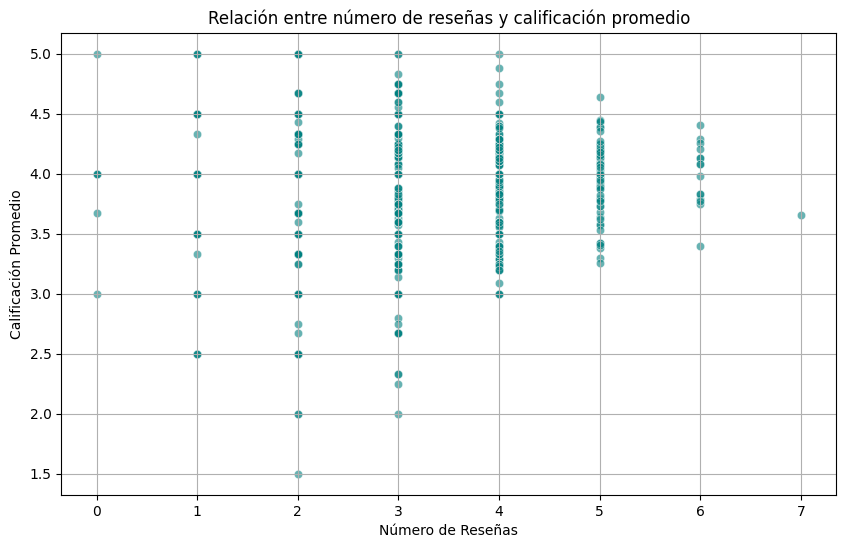

In [16]:
# Gráficar reseñas y calificación promedio por libro

plt.figure(figsize=(10, 6))

# Crear gráfico
sns.scatterplot(
    data=df_result, 
    x='numero_de_resenas', 
    y='calificacion_promedio', 
    alpha=0.6,
    color='teal'
)

plt.title('Relación entre número de reseñas y calificación promedio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

#### 💡 Hallazgo 2: Correlación entre reseñas y calificaciones

El gráfico muestra la distribución de los libros según el número de reseñas que recibieron y su calificación promedio:

- **La mayoría de los libros (>80%) tienen entre 2 y 5 reseñas**, lo que indica que la base de usuarios, aunque activa, aún tiene espacio para crecer en términos de engagement escrito.
- **Las calificaciones se concentran en el rango 3.5 – 4.5**, revelando una tendencia positiva generalizada. Esto podría indicar un efecto de selección: los usuarios tienden a leer libros que ya les interesan.
- **Los libros con 1-2 reseñas presentan mayor varianza** en calificaciones (entre 1.5 y 5.0), lo cual es esperable por el bajo volumen de datos — un solo usuario puede sesgar significativamente el promedio.
- **Los libros con más de 6 reseñas** son pocos pero interesantes: representan títulos consolidados con opiniones diversas. Uno de ellos tiene calificación baja (~3.3), lo que podría ser un libro controversial o que no cumplió expectativas a pesar de su popularidad.

**Implicación para el negocio:** Fomentar más reseñas escritas (con incentivos o gamificación) mejoraría la calidad de las recomendaciones y reduciría el sesgo estadístico en libros con pocas opiniones.


### Editorial con más libros de más de 50 páginas

In [17]:
query = """
SELECT 
    p.publisher AS editorial,
    COUNT(b.book_id) AS cantidad_de_libros
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY cantidad_de_libros DESC
LIMIT 1;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

       editorial  cantidad_de_libros
0  Penguin Books                  42


#### 💡 Hallazgo 3: Penguin Books domina el catálogo con criterio de calidad

**Penguin Books** es la editorial con mayor número de títulos en la plataforma, con **42 libros de más de 50 páginas**. Este filtro es importante: excluye folletos o materiales cortos que no representan lecturas sustanciales.

El hecho de que Penguin Books encabece la lista no es sorprendente dado su prestigio histórico y su amplio catálogo que abarca desde clásicos de la literatura hasta bestsellers contemporáneos. Su presencia dominante sugiere que la plataforma tiene una oferta sólida y reconocida.

**Implicación para el negocio:** Una alianza estratégica o acuerdo preferencial con Penguin Books podría ser una palanca de crecimiento. Además, identificar las editoriales del top 5 permitiría priorizar negociaciones y ampliar el catálogo en las categorías más demandadas.


### Autor con la calificación promedio más alta (mínimo 50 calificaciones por libro)

In [18]:
query = """
SELECT 
    a.author AS autor,
    AVG(sub.avg_rating) AS calificacion_promedio_autor,
    SUM(sub.cantidad_calificaciones) AS total_calificaciones_autor
FROM (
    SELECT 
        b.book_id,
        b.author_id,
        AVG(r.rating) AS avg_rating,
        COUNT(r.rating_id) AS cantidad_calificaciones
    FROM books b
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY b.book_id, b.author_id
    HAVING COUNT(r.rating_id) >= 50
) AS sub
JOIN authors a ON sub.author_id = a.author_id
GROUP BY a.author
ORDER BY calificacion_promedio_autor DESC
LIMIT 1;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

                        autor  calificacion_promedio_autor  \
0  J.K. Rowling/Mary GrandPré                     4.283844   

   total_calificaciones_autor  
0                       310.0  


#### 💡 Hallazgo 4: J.K. Rowling lidera en calidad con alto volumen de calificaciones

El autor **J.K. Rowling / Mary GrandPré** obtuvo la **calificación promedio más alta (4.28/5.0)**, calculada sobre libros con al menos 50 calificaciones cada uno. En total, sus libros acumulan **310 calificaciones**, lo que respalda estadísticamente la solidez del resultado.

Este filtro de mínimo 50 calificaciones por libro es clave: garantiza que el promedio no esté inflado por pocas opiniones de usuarios fanáticos. Con ese estándar, un 4.28 representa una valoración genuinamente alta y consistente.

La mención de "Mary GrandPré" junto a Rowling es interesante: es la ilustradora original de la saga Harry Potter en su edición estadounidense, lo que sugiere que la plataforma registra obras colaborativas bajo ambos nombres.

**Implicación para el negocio:** Los autores con alta calificación y volumen son activos estratégicos. Destacarlos en recomendaciones personalizadas o secciones editoriales ("Lo mejor valorado") puede aumentar la conversión de nuevos lectores.


### Promedio de reseñas de texto entre usuarios que calificaron más de 50 libros

In [19]:
query = """
SELECT 
    AVG(review_count) AS promedio_reseñas
FROM (
    SELECT 
        rv.username,
        COUNT(rv.review_id) AS review_count
    FROM reviews rv
    WHERE rv.text IS NOT NULL AND TRIM(rv.text) != ''
      AND rv.username IN (
          SELECT username
          FROM ratings
          GROUP BY username
          HAVING COUNT(rating_id) > 50
      )
    GROUP BY rv.username
) AS user_reviews;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

   promedio_reseñas
0         24.333333


#### 💡 Hallazgo 5: Los usuarios más activos son también los más comprometidos

Los usuarios que han calificado **más de 50 libros** escribieron en promedio **24.33 reseñas de texto**. Esto equivale a que aproximadamente 1 de cada 2 calificaciones de estos usuarios viene acompañada de una reseña escrita.

Este es un indicador muy relevante: los usuarios hiperlectores no solo consumen contenido pasivamente, sino que activamente contribuyen a la comunidad con opiniones detalladas. En plataformas de contenido, este segmento suele representar una minoría que genera la mayoría del contenido de valor (principio de Pareto o regla 90-9-1).

**Implicación para el negocio:** Este grupo de "super usuarios" merece atención especial:
- Podrían ser candidatos para programas de **lectores beta** o **embajadores de la plataforma**.
- Sus reseñas son más confiables y detalladas, por lo que podrían tener mayor peso en los algoritmos de recomendación.
- Incentivos personalizados (acceso anticipado, insignias, descuentos) podrían aumentar su retención y lealtad.


---

## 🏁 Conclusión General del Análisis

Este análisis sobre la base de datos de la plataforma de lectura permitió extraer hallazgos accionables en tres dimensiones clave: **catálogo**, **contenido de calidad** y **comportamiento de usuarios**.

### Resumen de Hallazgos

| # | Consulta | Resultado | Dato Clave |
|---|----------|-----------|-----------|
| 1 | Libros post-2000 | 819 de 1,000 | 81.9% del catálogo es contemporáneo |
| 2 | Reseñas y calificaciones | Mayoría: 2-5 reseñas, promedio 3.5-4.5 | Alta satisfacción general, bajo volumen de reseñas |
| 3 | Editorial líder | Penguin Books | 42 títulos de más de 50 páginas |
| 4 | Autor mejor calificado | J.K. Rowling / Mary GrandPré | 4.28/5.0 con 310 calificaciones |
| 5 | Usuarios activos | Calificaron >50 libros | 24.33 reseñas escritas en promedio |

---

### 📈 Recomendaciones Estratégicas

1. **Fortalecer el catálogo contemporáneo:** Con el 82% de títulos publicados desde el 2000, la plataforma está bien posicionada para lectores modernos. Se recomienda mantener esta tendencia e incorporar novedades editoriales de forma sistemática.

2. **Aumentar el volumen de reseñas:** La mayoría de los libros tienen pocas reseñas escritas, lo que limita la calidad de las recomendaciones. Implementar mecanismos de incentivo (recordatorios post-lectura, puntos, logros) podría aumentar esta métrica significativamente.

3. **Aprovechar a los super usuarios:** El grupo que califica más de 50 libros y escribe ~24 reseñas es un activo invaluable. Programas de fidelización y roles especiales (como "Lector Destacado") podrían retenerlos y amplificar su contribución.

4. **Negociar con editoriales clave:** Penguin Books lidera el catálogo. Establecer acuerdos preferenciales con las editoriales más representadas podría garantizar acceso temprano a nuevas publicaciones.

5. **Destacar autores de alta calificación:** Autores como J.K. Rowling, con calificaciones sólidas respaldadas por alto volumen, son ideales para campañas de recomendación personalizadas que aumenten el tiempo de uso de la plataforma.

---

### 🔍 Limitaciones y Próximos Pasos

- El análisis se basó en 1,000 libros; una base de datos más amplia podría revelar patrones adicionales.
- No se analizó el **contenido textual** de las reseñas (análisis de sentimiento), lo cual podría enriquecer el hallazgo #2.
- Una segmentación más granular de los usuarios (por géneros preferidos, frecuencia de lectura) permitiría estrategias de personalización más efectivas.
- Sería valioso cruzar las calificaciones con el número de páginas para detectar si los libros más largos tienden a recibir mejores o peores valoraciones.

---
*Análisis realizado con Python, SQLAlchemy y pandas sobre una base de datos PostgreSQL académica proporcionada por Practicum/Yandex.*
